In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#한글 폰트 적용# Big Data 분석(II) 종합실습
plt.rcParams["font.family"] = "NanumGothic"

In [72]:
df_raw = pd.read_csv("C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/유방암.csv", engine = 'python', )

In [73]:
path = 'C:/Program Files/Graphviz/bin/'

In [74]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [75]:
df_dummy = pd.get_dummies(df_raw) #더미변수 생성
df_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_양성,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,0,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,1,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,0,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,1,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1,0


In [76]:
df_raw_y = df_raw['diagnosis']
df_raw_x = df_raw.drop('diagnosis',axis=1,inplace=False)

In [77]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.4, random_state=1234)
#주어진 조건과 같이 train은 0.6, test는 0.4비율로 분할
print("train data x size : {}".format(df_train_x.shape))
print("train data y size : {}".format(df_train_y.shape))
print("test data x size : {}".format(df_test_x.shape))
print("test data y size : {}".format(df_test_y.shape))

train data x size : (192, 30)
train data y size : (192,)
test data x size : (128, 30)
test data y size : (128,)


In [78]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.901
Accuracy on test set:0.930


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [79]:
train_accuracy = [];test_accuracy=[]
para_hidden = [20* hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234)
#     nn = MLPClassifier(hidden_layer_sized= (v_hidden,v_hidden),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [80]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.505,0.625
1,40,0.594,0.758
2,60,0.917,0.930
3,80,0.932,0.898
4,100,0.901,0.930
5,120,0.599,0.758
6,140,0.599,0.758
7,160,0.599,0.758


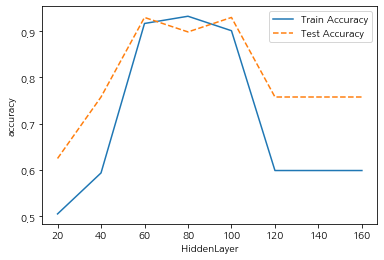

In [81]:
plt.plot(para_hidden,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_hidden,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("HiddenLayer")
plt.legend()

In [82]:
train_accuracy = []; test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn=MLPClassifier(activation = v_function,random_state = 1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [83]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.948,0.898
1,tanh,0.958,0.891
2,relu,0.901,0.930


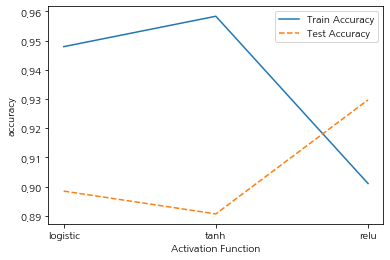

In [84]:
plt.plot(para_function,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_function,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel('Activation Function')
plt.legend()

In [85]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [86]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state = 1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

train data X size:(192, 30)
test data X size:(128, 30)


In [87]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

print('Accuracy on training set:{:.3f}'.format(nn_scaled.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(nn_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set:0.995
Accuracy on test set:0.953


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [88]:
train_accuracy = []; test_accuracy = []
para_hidden = [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [89]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.995,0.953
1,40,0.995,0.953
2,60,0.995,0.953
3,80,1.000,0.938
4,100,1.000,0.945
5,120,1.000,0.953
6,140,1.000,0.945
7,160,1.000,0.953
8,180,1.000,0.953
9,200,1.000,0.945


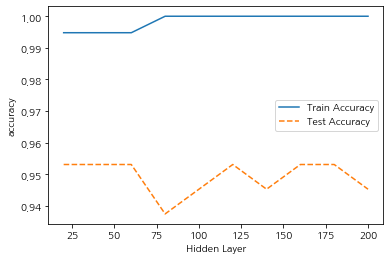

In [90]:
plt.plot(para_hidden,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_hidden,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Hidden Layer")
plt.legend()

In [91]:
train_accuracy = []; test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn=MLPClassifier(activation = v_function,hidden_layer_sizes=(80,80),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [92]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.945
1,tanh,1.000,0.953
2,relu,1.000,0.938


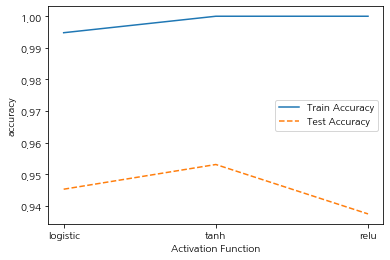

In [93]:
plt.plot(para_function,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_function,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Activation Function")
plt.legend()

In [63]:
activation = 'relu'

In [64]:
train_accuracy = []; test_accuracy = []
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn=MLPClassifier(solver= v_solver, activation ='relu',hidden_layer_sizes=(80,80),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["ActivationFunction"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [65]:
df_accuracy_solver.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.938
1,sgd,0.979,0.906
2,adam,1.000,0.938


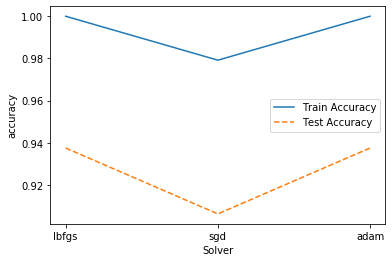

In [66]:
plt.plot(para_solver,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_solver,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Solver")
plt.legend()

In [67]:
train_accuracy = []; test_accuracy = []
para_batch = [20 * batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn=MLPClassifier(batch_size= v_batch, solver = 'adam', activation = 'relu',hidden_layer_sizes=(80,80),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["MiniBatch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

In [68]:
df_accuracy_batch.round(3)

,MiniBatch,TrainAccuracy,TestAccuracy
0,20,1.0,0.938
1,40,1.0,0.938
2,60,1.0,0.938
3,80,1.0,0.938
4,100,1.0,0.938
5,120,1.0,0.938
6,140,1.0,0.938
7,160,1.0,0.938
8,180,1.0,0.945


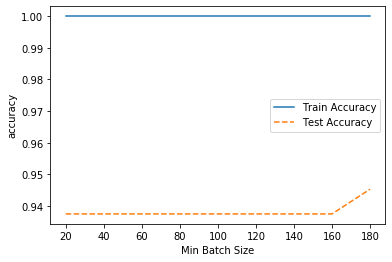

In [69]:
plt.plot(para_batch,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_batch,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Min Batch Size")
plt.legend()

In [70]:
nn_final = MLPClassifier(hidden_layer_sizes = (80, 80), activation = 'relu', solver ='adam', batch_size = 100, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set:{:.3f}'.format(nn_final.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}\n'.format(nn_final.score(df_scaled_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set:1.000
Accuracy on test set:0.938

confusion matrix:
[[31  0]
 [ 8 89]]
              precision    recall  f1-score   support

          양성      0.795     1.000     0.886        31
          음성      1.000     0.918     0.957        97

    accuracy                          0.938       128
   macro avg      0.897     0.959     0.921       128
weighted avg      0.950     0.938     0.940       128

